# Tarea4: Derivación automática 2

Fecha de envío del PR inicial: **viernes 7 de abril**

Fecha de aceptación del PR: **martes 18 de abril, antes de la clase**

---

## Ejercicio 1

Implementen las funciones relacionadas con potencias, exponenciales, logarítmos, las funciones trigonométricas y las hiperbólicas que tiene Julia definidas (ver la [documentación](http://julia.readthedocs.io/en/stable/manual/mathematical-operations/#trigonometric-and-hyperbolic-functions)). La implementación debe incluir los tests adecuados. La manera en que implementen las cosas debe estar clara en el notebook "Tarea4.ipynb", pero toda la funcionalidad debe ser incluida en "AutomDiff.jl" al igual que en "runtests.jl"

**Hint:** Pueden aprovechar las capacidades de Julia en metaprogramming.

### Derivadas Trigonometricas

\begin{array}{lll}
 1.\displaystyle{\frac{d}{dx}\sin(u)=\cos(u)\frac{du}{dx}}& &
 2.\displaystyle{\frac{d}{dx}\sin(u)=\cos(u)\frac{du}{dx}}\\
 3.\displaystyle{\frac{d}{dx}\tan(u)=\sec^2(u)\frac{du}{dx}}& &
 4.\displaystyle{\frac{d}{dx}\cot(u)=-\csc^2(u)\frac{du}{dx}}\\
 5.\displaystyle{\frac{d}{dx}\sec(u)=\sec(u)\tan(u)\frac{du}{dx}}& &
 6.\displaystyle{\frac{d}{dx}\csc(u)=-\csc(u)\cot(u)\frac{du}{dx}}\\
 7.\displaystyle{\frac{d}{dx}\cosh(u)=\sinh(u)\frac{du}{dx}}& &
 8.\displaystyle{\frac{d}{dx}\sinh(u)=\cosh(u)\frac{du}{dx}}\\
 9.\displaystyle{\frac{d}{dx}\tanh(u)=\mbox{sech}^2(u)\frac{du}{dx}}& &
 10.\displaystyle{\frac{d}{dx}\coth(u)=-\mbox{csch}^2(u)\frac{du}{dx}}\\
 11.\displaystyle{\frac{d}{dx}\mbox{sech}(u)=-\mbox{sech}(u)\tanh(u)\frac{du}{dx}}& &
 12.\displaystyle{\frac{d}{dx}\mbox{csch}(u)=-\mbox{csch}(u)\mbox{coth}(u)\frac{du}{dx}}\\
 13.\displaystyle{\frac{d}{dx}\mbox{arcsen}(u)=\frac{1}{\sqrt{1-u^2}}\frac{du}{dx}}&&
 14.\displaystyle{\frac{d}{dx}\mbox{arccos}(u)=-\frac{1}{\sqrt{1-u^2}}\frac{du}{dx}}\\
 15.\displaystyle{\frac{d}{dx}\mbox{arctan}(u)=\frac{1}{1+u^2}\frac{du}{dx}}& &
 16.\displaystyle{\frac{d}{dx}\mbox{arccot}(u)=-\frac{1}{1+u^2}\frac{du}{dx}}\\
 17.\displaystyle{\frac{d}{dx}\mbox{arcsec}(u)=\frac{1}{u\sqrt{u^2-1}}\frac{du}{dx}}&&
 18.\displaystyle{\frac{d}{dx}\mbox{arccot}(u)=-\frac{1}{u\sqrt{u^2-1}}\frac{du}{dx}}\\
\end{array}

In [1]:
include("AutomDiff.jl")
using AD

import Base:sqrt,cbrt,exp,log,sin,cos,tan,cot,sec,csc,sinh,cosh,tanh,coth,sech,csch,asin,acos,atan,acot,asec,acsc
#tuplas con las funciones (primera entrada) y sus derivadas (segunda entrada) 
for (f,fp) = ((:sin,(:(cos(a.fun)))),
              (:cos,(:(-sin(a.fun)))),
              (:sqrt,(:(1/(2*sqrt(a.fun))))),
              (:cbrt,(:(1/(3*cbrt((a.fun)^2))))),
              (:exp,(:(exp(a.fun)))),
              (:log,(:((1/(a.fun))))),
              (:tan,(:(sec(a.fun)^2))),
              (:cot,(:(-csc(a.fun)^2))),
              (:sec,(:(sec(a.fun)*tan(a.fun)))),
              (:csc,(:(-csc(a.fun)*cot(a.fun)))),
              (:cosh,(:(sinh(a.fun)))),
              (:sinh,(:(cosh(a.fun)))),
              (:tanh,(:(sech(a.fun)^2))),
              (:coth,(:(-csch(a.fun)^2))),
              (:sech,(:(-sech(a.fun)*tanh(a.fun)))),
              (:csch,(:(-csch(a.fun)*coth(a.fun)))),
              (:asin,(:(1/sqrt(1-(a.fun)^2)))),
              (:acos,(:(-1/sqrt(1-(a.fun)^2)))),
              (:atan,(:(1/(1+(a.fun)^2)))),
              (:acot,(:(-1/(1+(a.fun)^2)))),
              (:asec,(:(1/(a.fun*sqrt((a.fun)^2-1))))),
              (:acsc,(:(-1/(a.fun*sqrt((a.fun)^2-1))))))
    ex = quote
        $f(a::Dual)=Dual($f(a.fun),$fp*a.der)
    end
    #println(ex)
    @eval $ex
end

begin  # /home/madara/Semestreactual/Temas Selectos de Fisica Computacional I/tareas/AutomDiff.jl, line 95:
    sin(a::Dual) = begin  # /home/madara/Semestreactual/Temas Selectos de Fisica Computacional I/tareas/AutomDiff.jl, line 95:
            Dual(sin(a.fun),cos(a.fun) * a.der)
        end
end
begin  # /home/madara/Semestreactual/Temas Selectos de Fisica Computacional I/tareas/AutomDiff.jl, line 95:
    cos(a::Dual) = begin  # /home/madara/Semestreactual/Temas Selectos de Fisica Computacional I/tareas/AutomDiff.jl, line 95:
            Dual(cos(a.fun),-(sin(a.fun)) * a.der)
        end
end
begin  # /home/madara/Semestreactual/Temas Selectos de Fisica Computacional I/tareas/AutomDiff.jl, line 95:
    sqrt(a::Dual) = begin  # /home/madara/Semestreactual/Temas Selectos de Fisica Computacional I/tareas/AutomDiff.jl, line 95:
            Dual(sqrt(a.fun),(1 / (2 * sqrt(a.fun))) * a.der)
        end
end
begin  # /home/madara/Semestreactual/Temas Selectos de Fisica Computacional I/tareas/

In [2]:
using Base.Test
@testset "pruebas con operaciones entre Duales"begin
    @test sqrt(xdual(1))==Dual(1,1/2)
    @test cbrt(xdual(1)) == Dual(1,1/3)
    @test exp(xdual(0)) == Dual(1,1)
    a=exp(xdual(1))
    b=Dual(e,e)
    @test isapprox(a.der,b.der,atol=eps())
    @test isapprox(a.fun,b.fun,atol=eps())
    @test log(xdual(1)) == Dual(0,1)
    @test sin(xdual(1)) == Dual(sin(1),cos(1))
    a=sin(xdual(π))
    b=Dual(0,-1)
    @test isapprox(a.der,b.der,atol=eps())
    @test isapprox(a.fun,b.fun,atol=eps())
    @test cos(xdual(1)) == Dual(cos(1),-sin(1))
    @test cos(xdual(2π)) == Dual(cos(2π),-sin(2π))
    a=cos(xdual(2π))
    b=Dual(1,0)
    #@test isapprox(a.der,b.der,atol=eps())
    @test isapprox(a.fun,b.fun,atol=eps())
    @test tan(xdual(1)) == Dual(tan(1),sec(1)^2)
    @test tan(xdual(π/4)) == Dual(tan(π/4),sec(π/4)^2)
    a=tan(xdual(π/4))
    b=Dual(1,1/(cos(π/4)^2))
    @test isapprox(a.der,b.der,atol=eps())
    @test isapprox(a.fun,b.fun,atol=eps())
    @test cot(xdual(1)) == Dual(cot(1),-csc(1)^2)
    @test sec(xdual(1)) == Dual(sec(1),sec(1)*tan(1))
    @test csc(xdual(1)) == Dual(csc(1),-csc(1)*cot(1))
    @test sinh(xdual(1)) == Dual(sinh(1),cosh(1))
    @test cosh(xdual(1)) == Dual(cosh(1),sinh(1))
    @test tanh(xdual(1)) == Dual(tanh(1),sech(1)^2)
    @test coth(xdual(1)) == Dual(coth(1),-csch(1)^2)
    @test sech(xdual(1)) == Dual(sech(1),-sech(1)*tanh(1))
    @test csch(xdual(1)) == Dual(csch(1),-csch(1)*coth(1))
    @test asin(xdual(0.5)) == Dual(asin(0.5),1/sqrt(1-(1/2)^2))
    @test acos(xdual(0.5)) == Dual(acos(0.5),-1/sqrt(1-(1/2)^2))
    @test atan(xdual(0.5)) == Dual(atan(0.5),1/(1+(0.5)^2))
    @test acot(xdual(0.5)) == Dual(acot(0.5),-1/(1+(0.5)^2))
    @test asec(xdual(2)) == Dual(asec(2),1/(2*sqrt((2)^2-1)))
    @test acsc(xdual(2)) == Dual(acsc(2),-1/(2*sqrt((2)^2-1)))
end

Test Summary:                        | Pass  Total
  pruebas con operaciones entre Duales |   31     31


In [3]:
#workspace()                  # borra todo lo que has hecho en la sesión
include("runtest.jl")     # corre los tests

begin  # /home/madara/Semestreactual/Temas Selectos de Fisica Computacional I/tareas/AutomDiff.jl, line 95:
    sin(a::Dual) = begin  # /home/madara/Semestreactual/Temas Selectos de Fisica Computacional I/tareas/AutomDiff.jl, line 95:
            Dual(sin(a.fun),cos(a.fun) * a.der)
        end
end
begin  # /home/madara/Semestreactual/Temas Selectos de Fisica Computacional I/tareas/AutomDiff.jl, line 95:
    cos(a::Dual) = begin  # /home/madara/Semestreactual/Temas Selectos de Fisica Computacional I/tareas/AutomDiff.jl, line 95:
            Dual(cos(a.fun),-(sin(a.fun)) * a.der)
        end
end
begin  # /home/madara/Semestreactual/Temas Selectos de Fisica Computacional I/tareas/AutomDiff.jl, line 95:
    sqrt(a::Dual) = begin  # /home/madara/Semestreactual/Temas Selectos de Fisica Computacional I/tareas/AutomDiff.jl, line 95:
            Dual(sqrt(a.fun),(1 / (2 * sqrt(a.fun))) * a.der)
        end
end
begin  # /home/madara/Semestreactual/Temas Selectos de Fisica Computacional I/tareas/

Test Summary:                         | Pass  Total
  pruebas de las componentes de un Dual |    2      2
Test Summary:                        | 

Pass  Total
  pruebas con operaciones entre Duales |   16     16
Test Summary:                                                     | Pass  Total
  pruebas con operaciones en funciones trigonometricas entre Duales |   31     31


In [4]:
#using AD
#=workspace()
include("AutomDiff.jl")
using AD=#

---

## Ejercicio 2

Prueben su implementación calculando la derivada de $f(x) = \sin\Big(x^3 - \frac{2}{x^6}\Big)$
en $x_0 = 2$.

Dibujen, para $x_0 \in [1,5]$ la función $f'(x)$.

In [5]:
f(x)=sin(x^3-2/(x^6))

f (generic function with 1 method)

In [6]:
fp(x)=cos(x^3-2/(x^6))*(3x^2+12/(x^7))#Derivada de la función f(x)

fp (generic function with 1 method)

In [7]:
a=(f(2),fp(2))

(0.9934213368955197,-1.384934905523464)

In [8]:
f(xdual(2))

AD.Dual{Float64}(0.9934213368955197,-1.384934905523464)

In [9]:
using PyPlot

In [10]:
n=10000                         #número de divisiones entre el 1 y 5
h=(5-1)/n                       #valor de cada división
y=[i=zero(eltype(h)) for i=1:n] #vector y con n entradas igual a 0
x=[i=zero(eltype(h)) for i=1:n] #vector x con n entradas igual a 0
z=[i=zero(eltype(h)) for i=1:n] #vector z con n entradas igual a 0
for i in 1:n
    x0=1+h*i
    a=f(xdual(x0))
    x[i]=x0                     #valores de x0
    y[i]=a.der                  #valores de f'(x)
    z[i]=a.fun                  #valores de f(x)
end

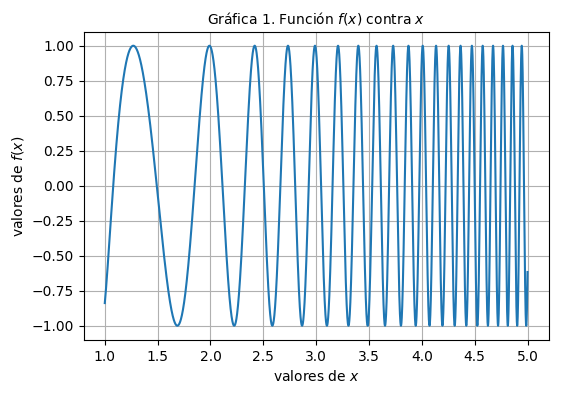

In [11]:
figure(figsize=(6,4)) # este comando define el tamaño de la figura
plot(x,z)    # este comando pinta la función f'(x); 
title(L"Gráfica 1. Función $f(x)$ contra $x$", fontsize=10)
xlabel(L"valores de $x$")
ylabel(L"valores de $f(x)$")
grid() 

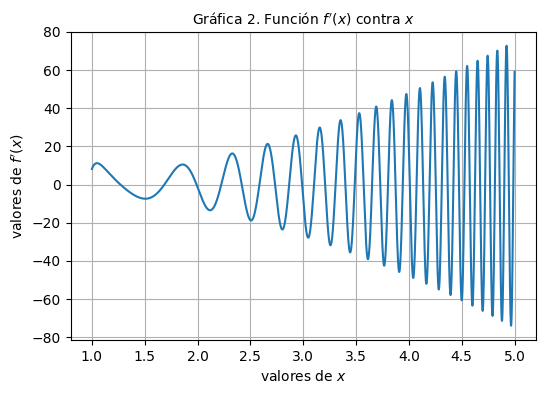

In [12]:
figure(figsize=(6,4)) # este comando define el tamaño de la figura
plot(x,y)    # este comando pinta la función f'(x); 
title(L"Gráfica 2. Función $f'(x)$ contra $x$", fontsize=10)
xlabel(L"valores de $x$")
ylabel(L"valores de $f'(x)$")
grid()    

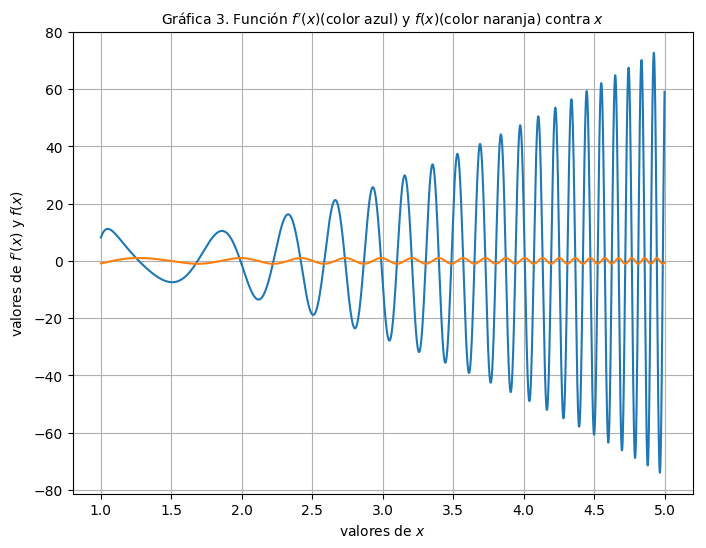

In [13]:
figure(figsize=(8,6)) # este comando define el tamaño de la figura
plot(x,y)    # este comando pinta la función f'(x); 
plot(x,z)    # este comando pinta la función f(x)          
title(L"Gráfica 3. Función $f'(x)$(color azul) y $f(x)$(color naranja) contra $x$", fontsize=10)
xlabel(L"valores de $x$")
ylabel(L"valores de $f'(x)$ y $f(x)$")
grid()

---

## Ejercicio 3

Implementen el método de Newton para una función arbitraria $f(x)$ en una variable (la función `newton1D` debe tener un argumento que es una función) a fin de encontrar un cero de la función, i.e., $f(x^*)=0$. El método de Newton requiere la derivada evaluada en diversos puntos, cosa que obtendrán usando el módulo de derivación automática.

- Obtengan, usando su función del método de Newton, las raices del polinomio de Wilkinson $W_{6}(x)$, usando como iterados iniciales $x_0=2.2$ y $x_0=2.45$.
    
- Hagan lo mismo que en el inciso anterior para $g(x) = x \sin(2x)$, con $x_0=0.7$.

In [14]:
"""
    calcula_raices(f,condiciones_iniciales)

Esta función calcula las raices de una función `f(x)`, que debe haberse definido,
considerando distintos valores de las condiciones iniciales en el intervalo 
\$ x\\in [a,b] \$ , y devuelve los resultados obtenidos en un vector. h es el incremento
"""
function calcula_raices(f,condiciones_iniciales)
    raices = similar(condiciones_iniciales)#condiciones_iniciales = a:h:b
    for (j, x_0) in enumerate(condiciones_iniciales)
        x = x_0
        for i in 1:100
            a=f(xdual(x))
            x = x - a.fun/a.der
        end
        raices[j] = x
    end
    return raices
end

calcula_raices

In [15]:
?calcula_raices

search:



```
calcula_raices(f,condiciones_iniciales)
```

Esta función calcula las raices de una función `f(x)`, que debe haberse definido, considerando distintos valores de las condiciones iniciales en el intervalo  $ x\in [a,b] $ , y devuelve los resultados obtenidos en un vector. h es el incremento


In [16]:
calcula_raices(x->x^2-3,0.0:0.5:6.0)

13-element Array{Float64,1}:
 NaN      
   1.73205
   1.73205
   1.73205
   1.73205
   1.73205
   1.73205
   1.73205
   1.73205
   1.73205
   1.73205
   1.73205
   1.73205

In [17]:
nombre(n::Int) = Symbol( string("W_", n) )

function wilkinson(n::Int)
    # Checo que `n` sea >= 1
    @assert n >= 1
    
    ex = :(x-1)
    for i = 2:n
        ex = :( ($ex) * ( x-$i) )
    end
    ex_ret = :( $(nombre(n))(x) = $ex )
    println(ex_ret)#ex_ret
    @eval $ex_ret
end

wilkinson(6)

W_6(x) = begin  # In[17], line 11:
        (((((x - 1) * (x - 2)) * (x - 3)) * (x - 4)) * (x - 5)) * (x - 6)
    end


W_6 (generic function with 1 method)

In [18]:
W_6(1.2)

-14.708735999999996

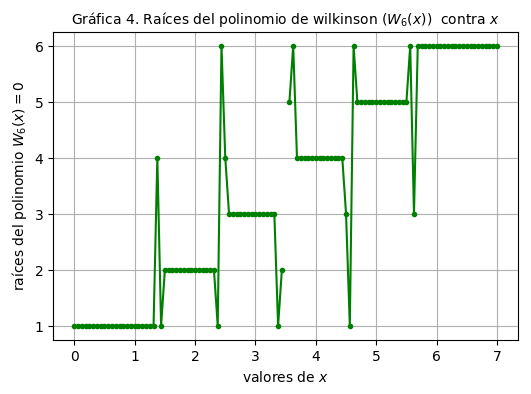

In [19]:
rango=0:1/2^4:7
raices = calcula_raices( W_6,rango)
figure(figsize=(6,4))
plot(rango, raices, "g.-")
title(L"Gráfica 4. Raíces del polinomio de wilkinson ($W_6(x)$)  contra $x$", fontsize=10)
xlabel(L"valores de $x$")
ylabel(L"raíces del polinomio $W_6(x)=0$")
grid()

In [20]:
g(x) = x*sin(2x)

g (generic function with 1 method)

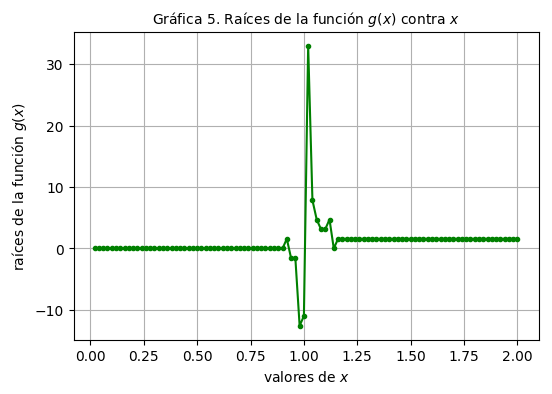

In [21]:
rango=0:0.02:2
raices = calcula_raices(g,rango)
figure(figsize=(6,4))
plot(rango, raices, "g.-")
title(L"Gráfica 5. Raíces de la función $g(x)$ contra $x$", fontsize=10)
xlabel(L"valores de $x$")
ylabel(L"raíces de la función $g(x)$")
grid()

---

## Pregunta

¿Qué hacer si se requieren derivadas de orden superior, es decir, la segunda, tercera, etc, derivada? Argumenten.

**NOTA:** Esta pregunta debe ser contestada pero **no** será considerada para aceptar la tarea, aunque sí se les dará retroalimentación respecto a lo que escriben. La idea es empezar a pensar en esto.

*Podría definir una nueva estructura utilizando la de los duales, como DDual{f(función),f'(primera derivada),f''(segunda derivada)}. En este caso utilizo la parte de los duales Dual(f,f') como la segunda y tercera componente de la estructura DDual(f,f',f''), es decir uso Dual(f,f') e integro f para crear DDual(f,f',f''), donde la integral de f será la nueva función f.* 


In [22]:
#=Aquí trato de definir una función que me regrese el vector (f,f',f'') a partir de la información de los Duales. 
El problema es que no se como pedir la expresión de a.der para usarla como función.

function DerDual(f,x0)
    a=f(xdual(x0))
    b=a.der(xdual(x0))
    return a.fun,a.der,b.der 
end=#

In [28]:
#=
type DDual{T<:Real}
    Fun::T
    Der1::T
    Der2::T
end
DDual(a,b,c) = DDual(promote(a,b,c)...)
x0=1
A=xdual(x0)
xddual(x0)=DDual(A.fun,A.der,0)
B=Dual(x0)
DDual(x0)=DDual(B.fun,B.der,0)
xddual(1)=#